In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

In [43]:
population_df = pd.read_csv('./data/population.csv', thousands = ',')
average_rainfall_df = pd.read_csv('./data/average_rainfall.csv', thousands = ',')
average_temperature_df = pd.read_csv('./data/average_temperature.csv', thousands = ',')
covid_19 = pd.read_csv('./data/owid-covid-data.csv', thousands = ',')
gdp_df = pd.read_csv('./data/gdp.csv')
# stringency_df = pd.read_csv('./data/stringency_index.csv', thousands = ',')
median_age_df = pd.read_csv('./data/median_age.csv', thousands = ',')

In [44]:
average_rainfall_df

,avg_rainfall,country_name
0,2722,Brunei
1,1904,Cambodia
2,2702,Indonesia
3,1834,Laos
4,2875,Malaysia
5,2091,Myanmar
6,2348,Philippines
7,2497,Singapore
8,1622,Thailand
9,1500,Timor Leste


In [45]:
df_list = [population_df, gdp_df, median_age_df,
           average_rainfall_df, average_temperature_df]
for i in range(len(df_list)):
    print("**SUM of NA Values**")
    print(df_list[i].isna().sum())

**SUM of NA Values**
area            0
country_name    0
population      0
dtype: int64
**SUM of NA Values**
country_name    0
gdp             0
dtype: int64
**SUM of NA Values**
country_name    0
median_age      0
dtype: int64
**SUM of NA Values**
avg_rainfall    0
country_name    0
dtype: int64
**SUM of NA Values**
avg_temp        0
country_name    0
dtype: int64


In [46]:
sea_countries = ['Brunei', 'Cambodia', 'Indonesia', 'Malaysia', 'Myanmar', 'Laos',
                           'Philippines', 'Singapore', 'Thailand', 'Timor', 'Vietnam']
covid_19= covid_19[covid_19['location'].isin(sea_countries)]
covid_19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
20342,BRN,Asia,Brunei,2020-03-09,1.0,1.0,NaN,NaN,NaN,NaN,...,2.0,30.9,NaN,2.7,75.86,0.838,NaN,NaN,NaN,NaN
20343,BRN,Asia,Brunei,2020-03-10,1.0,0.0,NaN,NaN,NaN,NaN,...,2.0,30.9,NaN,2.7,75.86,0.838,NaN,NaN,NaN,NaN
20344,BRN,Asia,Brunei,2020-03-11,11.0,10.0,NaN,NaN,NaN,NaN,...,2.0,30.9,NaN,2.7,75.86,0.838,NaN,NaN,NaN,NaN
20345,BRN,Asia,Brunei,2020-03-12,11.0,0.0,NaN,NaN,NaN,NaN,...,2.0,30.9,NaN,2.7,75.86,0.838,NaN,NaN,NaN,NaN
20346,BRN,Asia,Brunei,2020-03-13,37.0,26.0,NaN,NaN,NaN,NaN,...,2.0,30.9,NaN,2.7,75.86,0.838,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145308,VNM,Asia,Vietnam,2021-12-14,1443648.0,15220.0,15160.714,28333.0,252.0,233.286,...,1.0,45.9,85.847,2.6,75.40,0.704,NaN,NaN,NaN,NaN
145309,VNM,Asia,Vietnam,2021-12-15,1459175.0,15527.0,15293.286,28616.0,283.0,240.857,...,1.0,45.9,85.847,2.6,75.40,0.704,NaN,NaN,NaN,NaN
145310,VNM,Asia,Vietnam,2021-12-16,1493237.0,34062.0,17972.000,28857.0,241.0,238.714,...,1.0,45.9,85.847,2.6,75.40,0.704,NaN,NaN,NaN,NaN
145311,VNM,Asia,Vietnam,2021-12-17,1508473.0,15236.0,18028.714,29103.0,246.0,243.000,...,1.0,45.9,85.847,2.6,75.40,0.704,NaN,NaN,NaN,NaN


In [47]:
selected_columns = ['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 
                    'new_deaths', 'stringency_index']
covid_19 = covid_19[selected_columns].fillna(0)

In [48]:
covid_19.replace({'Timor': 'Timor Leste'}, inplace=True)

In [49]:
covid_19[covid_19['location']=='Timor Leste']

,location,date,total_cases,new_cases,total_deaths,new_deaths,stringency_index
132969,Timor Leste,2020-03-22,1.0,1.0,0.0,0.0,13.89
132970,Timor Leste,2020-03-23,1.0,0.0,0.0,0.0,30.56
132971,Timor Leste,2020-03-24,1.0,0.0,0.0,0.0,30.56
132972,Timor Leste,2020-03-25,1.0,0.0,0.0,0.0,30.56
132973,Timor Leste,2020-03-26,1.0,0.0,0.0,0.0,30.56
...,...,...,...,...,...,...,...
133601,Timor Leste,2021-12-14,19830.0,1.0,122.0,0.0,0.00
133602,Timor Leste,2021-12-15,19830.0,0.0,122.0,0.0,0.00
133603,Timor Leste,2021-12-16,19830.0,0.0,122.0,0.0,0.00
133604,Timor Leste,2021-12-17,19832.0,2.0,122.0,0.0,0.00


In [50]:
covid_19 = covid_19.rename(columns={"location": "Country name", "date": "Date", "total_cases": "Total cases",
                        "new_cases": "New cases", "total_deaths": "Total deaths", "new_deaths": "New deaths", "stringency_index": "Stringency index"})

In [51]:
covid_19

,Country name,Date,Total cases,New cases,Total deaths,New deaths,Stringency index
20342,Brunei,2020-03-09,1.0,1.0,0.0,0.0,19.44
20343,Brunei,2020-03-10,1.0,0.0,0.0,0.0,19.44
20344,Brunei,2020-03-11,11.0,10.0,0.0,0.0,30.56
20345,Brunei,2020-03-12,11.0,0.0,0.0,0.0,30.56
20346,Brunei,2020-03-13,37.0,26.0,0.0,0.0,50.00
...,...,...,...,...,...,...,...
145308,Vietnam,2021-12-14,1443648.0,15220.0,28333.0,252.0,0.00
145309,Vietnam,2021-12-15,1459175.0,15527.0,28616.0,283.0,0.00
145310,Vietnam,2021-12-16,1493237.0,34062.0,28857.0,241.0,0.00
145311,Vietnam,2021-12-17,1508473.0,15236.0,29103.0,246.0,0.00


In [52]:
df = population_df

for i in range(1, len(df_list)):
    df = pd.merge(df, df_list[i], on='country_name', how='inner')
df

,area,country_name,population,gdp,median_age,avg_rainfall,avg_temp
0,1904569,Indonesia,273523615,"$1,015,420,587,285",30.2,2702,25.85
1,342353,Philippines,109581078,"$313,595,208,737",23.5,2348,25.85
2,331212,Vietnam,97338579,"$223,779,865,815",30.5,1821,24.45
3,513120,Thailand,69799978,"$455,302,682,986",37.7,1622,26.30
4,676578,Myanmar,54409800,"$67,068,745,521",28.2,2091,13.05
5,330803,Malaysia,32365999,"$314,710,259,511",28.5,2875,25.40
6,181035,Cambodia,16718965,"$22,158,209,503",25.3,1904,26.80
7,236800,Laos,7275560,"$16,853,087,485",23.0,1834,22.80
8,710,Singapore,5850342,"$323,907,234,412",34.6,2497,26.45
9,14874,Timor Leste,1318445,"$2,954,621,000",18.9,1500,25.25


In [53]:
# df = df.sort_values('country_name')
# df

In [54]:
# country_name_column = df.pop('country_name')
# df.insert(0, 'country_name', country_name_column)
# df

In [55]:
df

,area,country_name,population,gdp,median_age,avg_rainfall,avg_temp
0,1904569,Indonesia,273523615,"$1,015,420,587,285",30.2,2702,25.85
1,342353,Philippines,109581078,"$313,595,208,737",23.5,2348,25.85
2,331212,Vietnam,97338579,"$223,779,865,815",30.5,1821,24.45
3,513120,Thailand,69799978,"$455,302,682,986",37.7,1622,26.30
4,676578,Myanmar,54409800,"$67,068,745,521",28.2,2091,13.05
5,330803,Malaysia,32365999,"$314,710,259,511",28.5,2875,25.40
6,181035,Cambodia,16718965,"$22,158,209,503",25.3,1904,26.80
7,236800,Laos,7275560,"$16,853,087,485",23.0,1834,22.80
8,710,Singapore,5850342,"$323,907,234,412",34.6,2497,26.45
9,14874,Timor Leste,1318445,"$2,954,621,000",18.9,1500,25.25


In [56]:
df = df.rename(columns={"country_name": "Country name", "population": "Population", "area": "Area", "gdp": "GDP",
                        "median_age": "Median age", "avg_rainfall": "Average rainfall",
                       "avg_temp": "Average temperature", "stringency_index": "Stringency index"})

In [57]:
df

,Area,Country name,Population,GDP,Median age,Average rainfall,Average temperature
0,1904569,Indonesia,273523615,"$1,015,420,587,285",30.2,2702,25.85
1,342353,Philippines,109581078,"$313,595,208,737",23.5,2348,25.85
2,331212,Vietnam,97338579,"$223,779,865,815",30.5,1821,24.45
3,513120,Thailand,69799978,"$455,302,682,986",37.7,1622,26.30
4,676578,Myanmar,54409800,"$67,068,745,521",28.2,2091,13.05
5,330803,Malaysia,32365999,"$314,710,259,511",28.5,2875,25.40
6,181035,Cambodia,16718965,"$22,158,209,503",25.3,1904,26.80
7,236800,Laos,7275560,"$16,853,087,485",23.0,1834,22.80
8,710,Singapore,5850342,"$323,907,234,412",34.6,2497,26.45
9,14874,Timor Leste,1318445,"$2,954,621,000",18.9,1500,25.25


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 11 non-null     int64  
 1   Country name         11 non-null     object 
 2   Population           11 non-null     int64  
 3   GDP                  11 non-null     object 
 4   Median age           11 non-null     float64
 5   Average rainfall     11 non-null     int64  
 6   Average temperature  11 non-null     float64
dtypes: float64(2), int64(3), object(2)
memory usage: 704.0+ bytes


In [59]:
df['GDP'] = df['GDP'].str[1:]
df['GDP'] = df['GDP'].str.replace(',', '').astype(float)

In [60]:
df = df.sort_values('Country name', ignore_index=True)

In [61]:
df

,Area,Country name,Population,GDP,Median age,Average rainfall,Average temperature
0,5765,Brunei,437479,1.212809e+10,30.2,2722,26.85
1,181035,Cambodia,16718965,2.215821e+10,25.3,1904,26.80
2,1904569,Indonesia,273523615,1.015421e+12,30.2,2702,25.85
3,236800,Laos,7275560,1.685309e+10,23.0,1834,22.80
4,330803,Malaysia,32365999,3.147103e+11,28.5,2875,25.40
5,676578,Myanmar,54409800,6.706875e+10,28.2,2091,13.05
6,342353,Philippines,109581078,3.135952e+11,23.5,2348,25.85
7,710,Singapore,5850342,3.239072e+11,34.6,2497,26.45
8,513120,Thailand,69799978,4.553027e+11,37.7,1622,26.30
9,14874,Timor Leste,1318445,2.954621e+09,18.9,1500,25.25


In [62]:
df.drop_duplicates(inplace=True)

In [63]:
s = covid_19.groupby('Country name').sum()
total_case = s['New cases'].tolist()
total_deaths = s['New deaths'].tolist()
df['Total cases'] = total_case
df['Total deaths'] = total_deaths

In [65]:
column_order = ["Country name", "Total cases", "Total deaths", "Population", "Area", "GDP", 
                "Median age", "Average rainfall", "Average temperature"]
df = df.reindex(columns=column_order)

In [66]:
df

,Country name,Total cases,Total deaths,Population,Area,GDP,Median age,Average rainfall,Average temperature
0,Brunei,15386.0,98.0,437479,5765,1.212809e+10,30.2,2722,26.85
1,Cambodia,120410.0,3003.0,16718965,181035,2.215821e+10,25.3,1904,26.80
2,Indonesia,4260380.0,143998.0,273523615,1904569,1.015421e+12,30.2,2702,25.85
3,Laos,97505.0,268.0,7275560,236800,1.685309e+10,23.0,1834,22.80
4,Malaysia,2715847.0,31073.0,32365999,330803,3.147103e+11,28.5,2875,25.40
5,Myanmar,528101.0,19213.0,54409800,676578,6.706875e+10,28.2,2091,13.05
6,Philippines,2837555.0,50675.0,109581078,342353,3.135952e+11,23.5,2348,25.85
7,Singapore,275655.0,810.0,5850342,710,3.239072e+11,34.6,2497,26.45
8,Thailand,2188625.0,21355.0,69799978,513120,4.553027e+11,37.7,1622,26.30
9,Timor Leste,19833.0,122.0,1318445,14874,2.954621e+09,18.9,1500,25.25


## Number of reported cases

In [67]:
df_cases = covid_19[['Country name', 'Date', 'New cases']]
df_cases

,Country name,Date,New cases
20342,Brunei,2020-03-09,1.0
20343,Brunei,2020-03-10,0.0
20344,Brunei,2020-03-11,10.0
20345,Brunei,2020-03-12,0.0
20346,Brunei,2020-03-13,26.0
...,...,...,...
145308,Vietnam,2021-12-14,15220.0
145309,Vietnam,2021-12-15,15527.0
145310,Vietnam,2021-12-16,34062.0
145311,Vietnam,2021-12-17,15236.0


In [68]:
df_cases = df_cases.pivot(index='Country name', 
              columns='Date', 
              values='New cases')

In [69]:
df_cases

Date,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-11,2020-01-12,2020-01-13,...,2021-12-09,2021-12-10,2021-12-11,2021-12-12,2021-12-13,2021-12-14,2021-12-15,2021-12-16,2021-12-17,2021-12-18
Country name,,,,,,,,,,,,,,,,,,,,,
Brunei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57.0,-18.0,60.0,5.0,14.0,1.0,9.0,4.0,9.0,1.0
Cambodia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,15.0,16.0,12.0,15.0,12.0,8.0,7.0,8.0,5.0
Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,220.0,192.0,228.0,163.0,106.0,190.0,205.0,213.0,291.0,232.0
Laos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1212.0,1645.0,1898.0,1274.0,1138.0,1358.0,1245.0,1493.0,1702.0,1249.0
Malaysia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5446.0,5058.0,4626.0,3490.0,3504.0,4097.0,3900.0,4262.0,4362.0,4083.0
Myanmar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,621.0,357.0,280.0,250.0,363.0,229.0,211.0,217.0,170.0
Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,403.0,204.0,160.0,232.0,211.0,65.0,47.0,101.0,448.0,91.0
Singapore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,682.0,454.0,559.0,370.0,339.0,442.0,474.0,355.0,412.0,271.0
Thailand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4193.0,4079.0,3787.0,0.0,3398.0,2862.0,3370.0,7221.0,0.0,3132.0


In [70]:
df_cases= df_cases.transpose()

In [71]:
datetime_index = pd.DatetimeIndex(df_cases.index)
df_cases.index

Index(['2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
       '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12', '2020-01-13',
       ...
       '2021-12-09', '2021-12-10', '2021-12-11', '2021-12-12', '2021-12-13',
       '2021-12-14', '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-18'],
      dtype='object', name='Date', length=715)

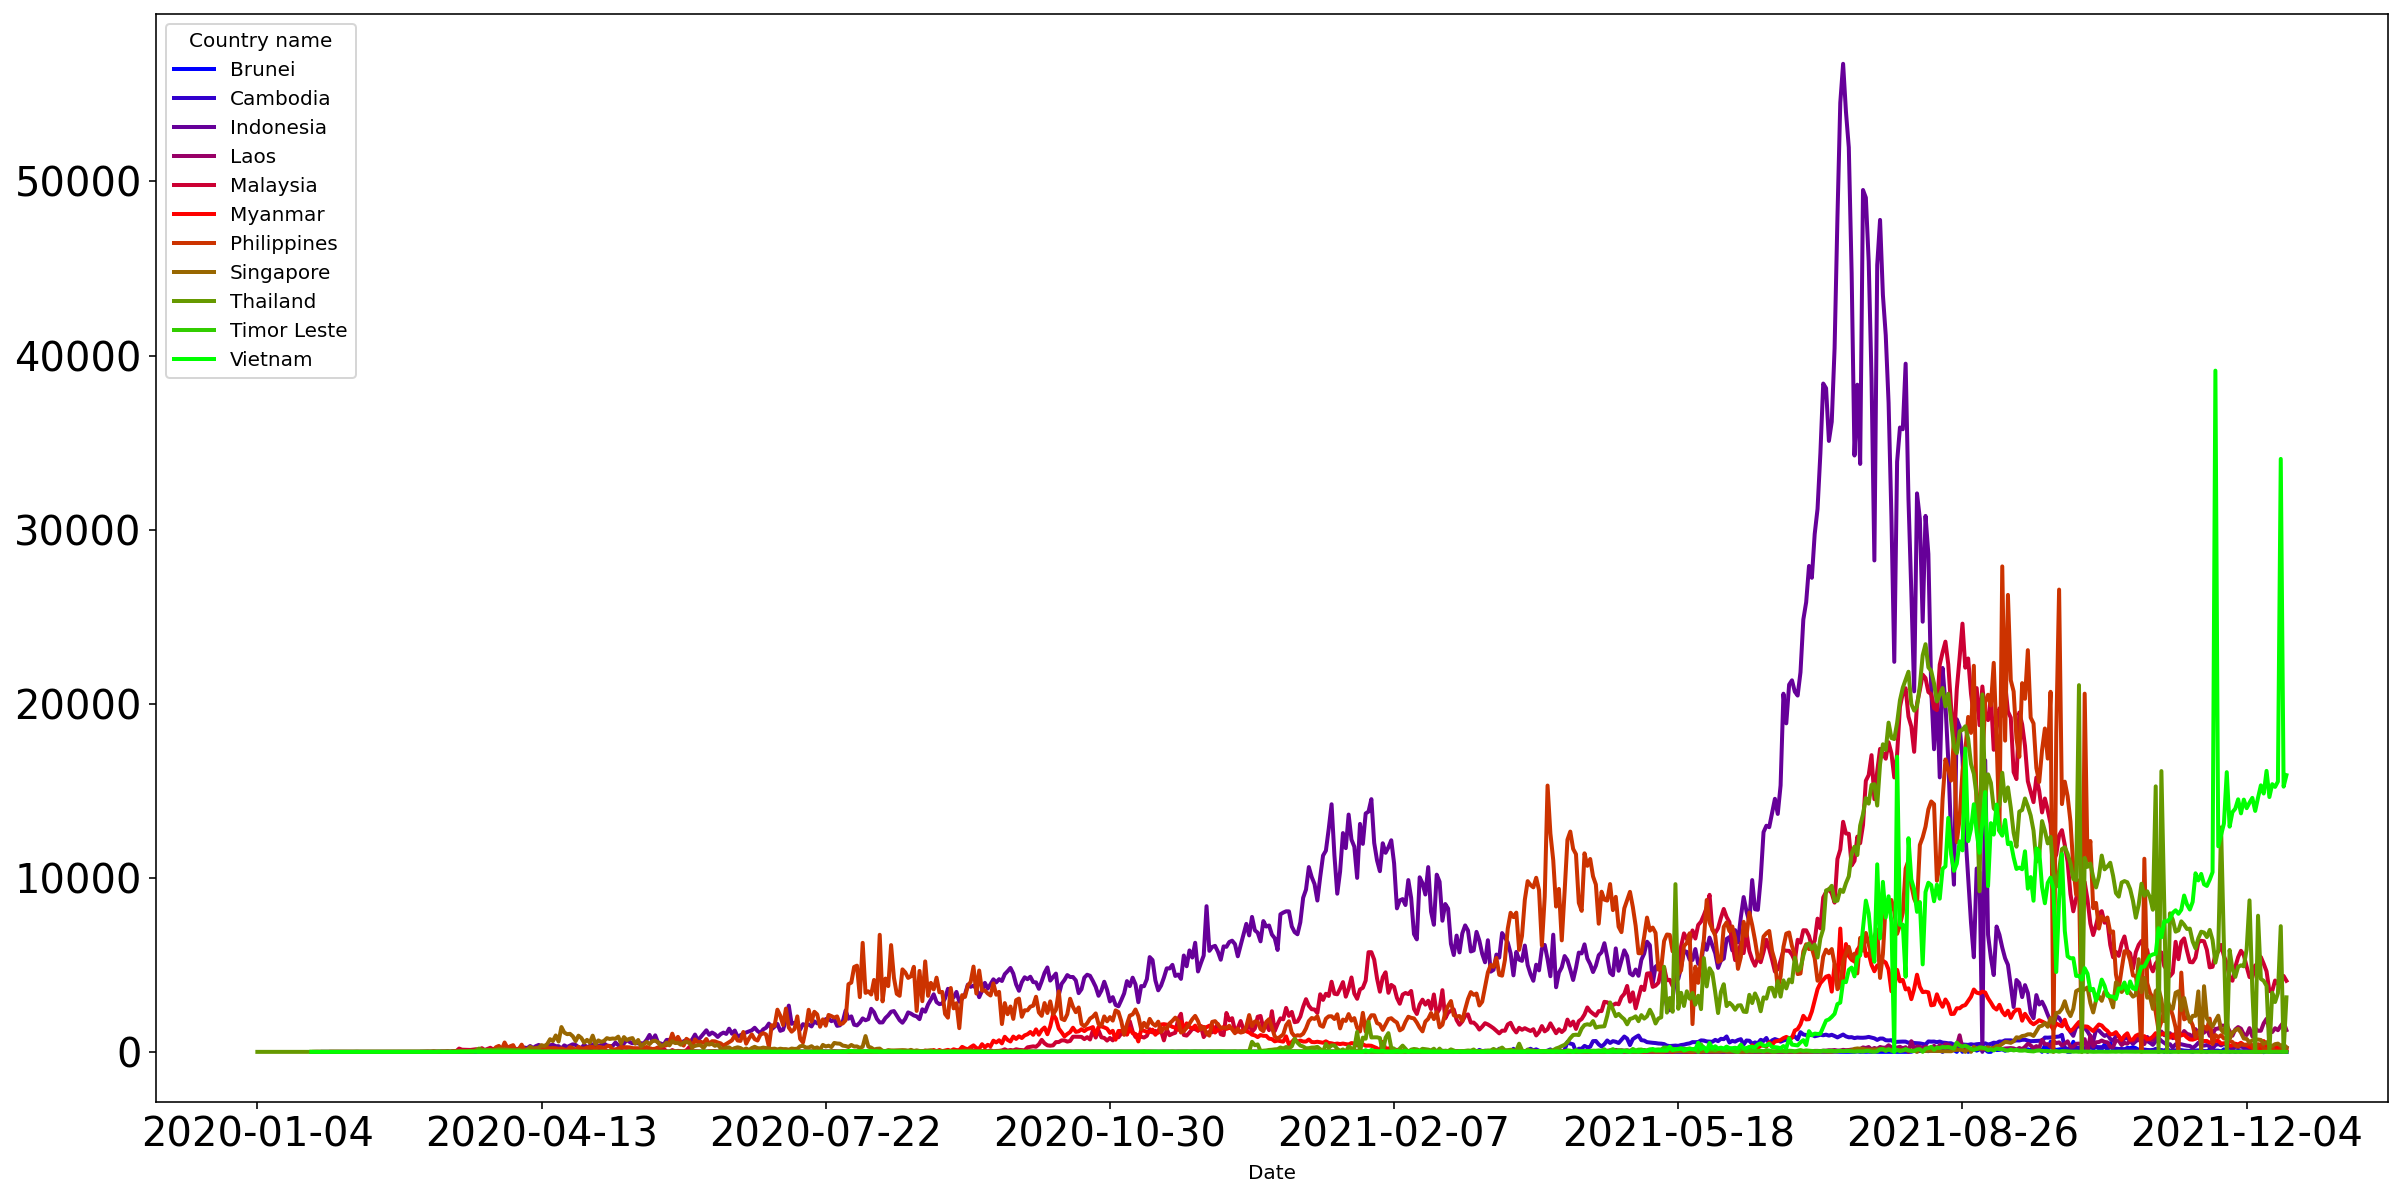

In [72]:
df_cases.plot(figsize=(20,10), linewidth=2, colormap='brg', fontsize=20);

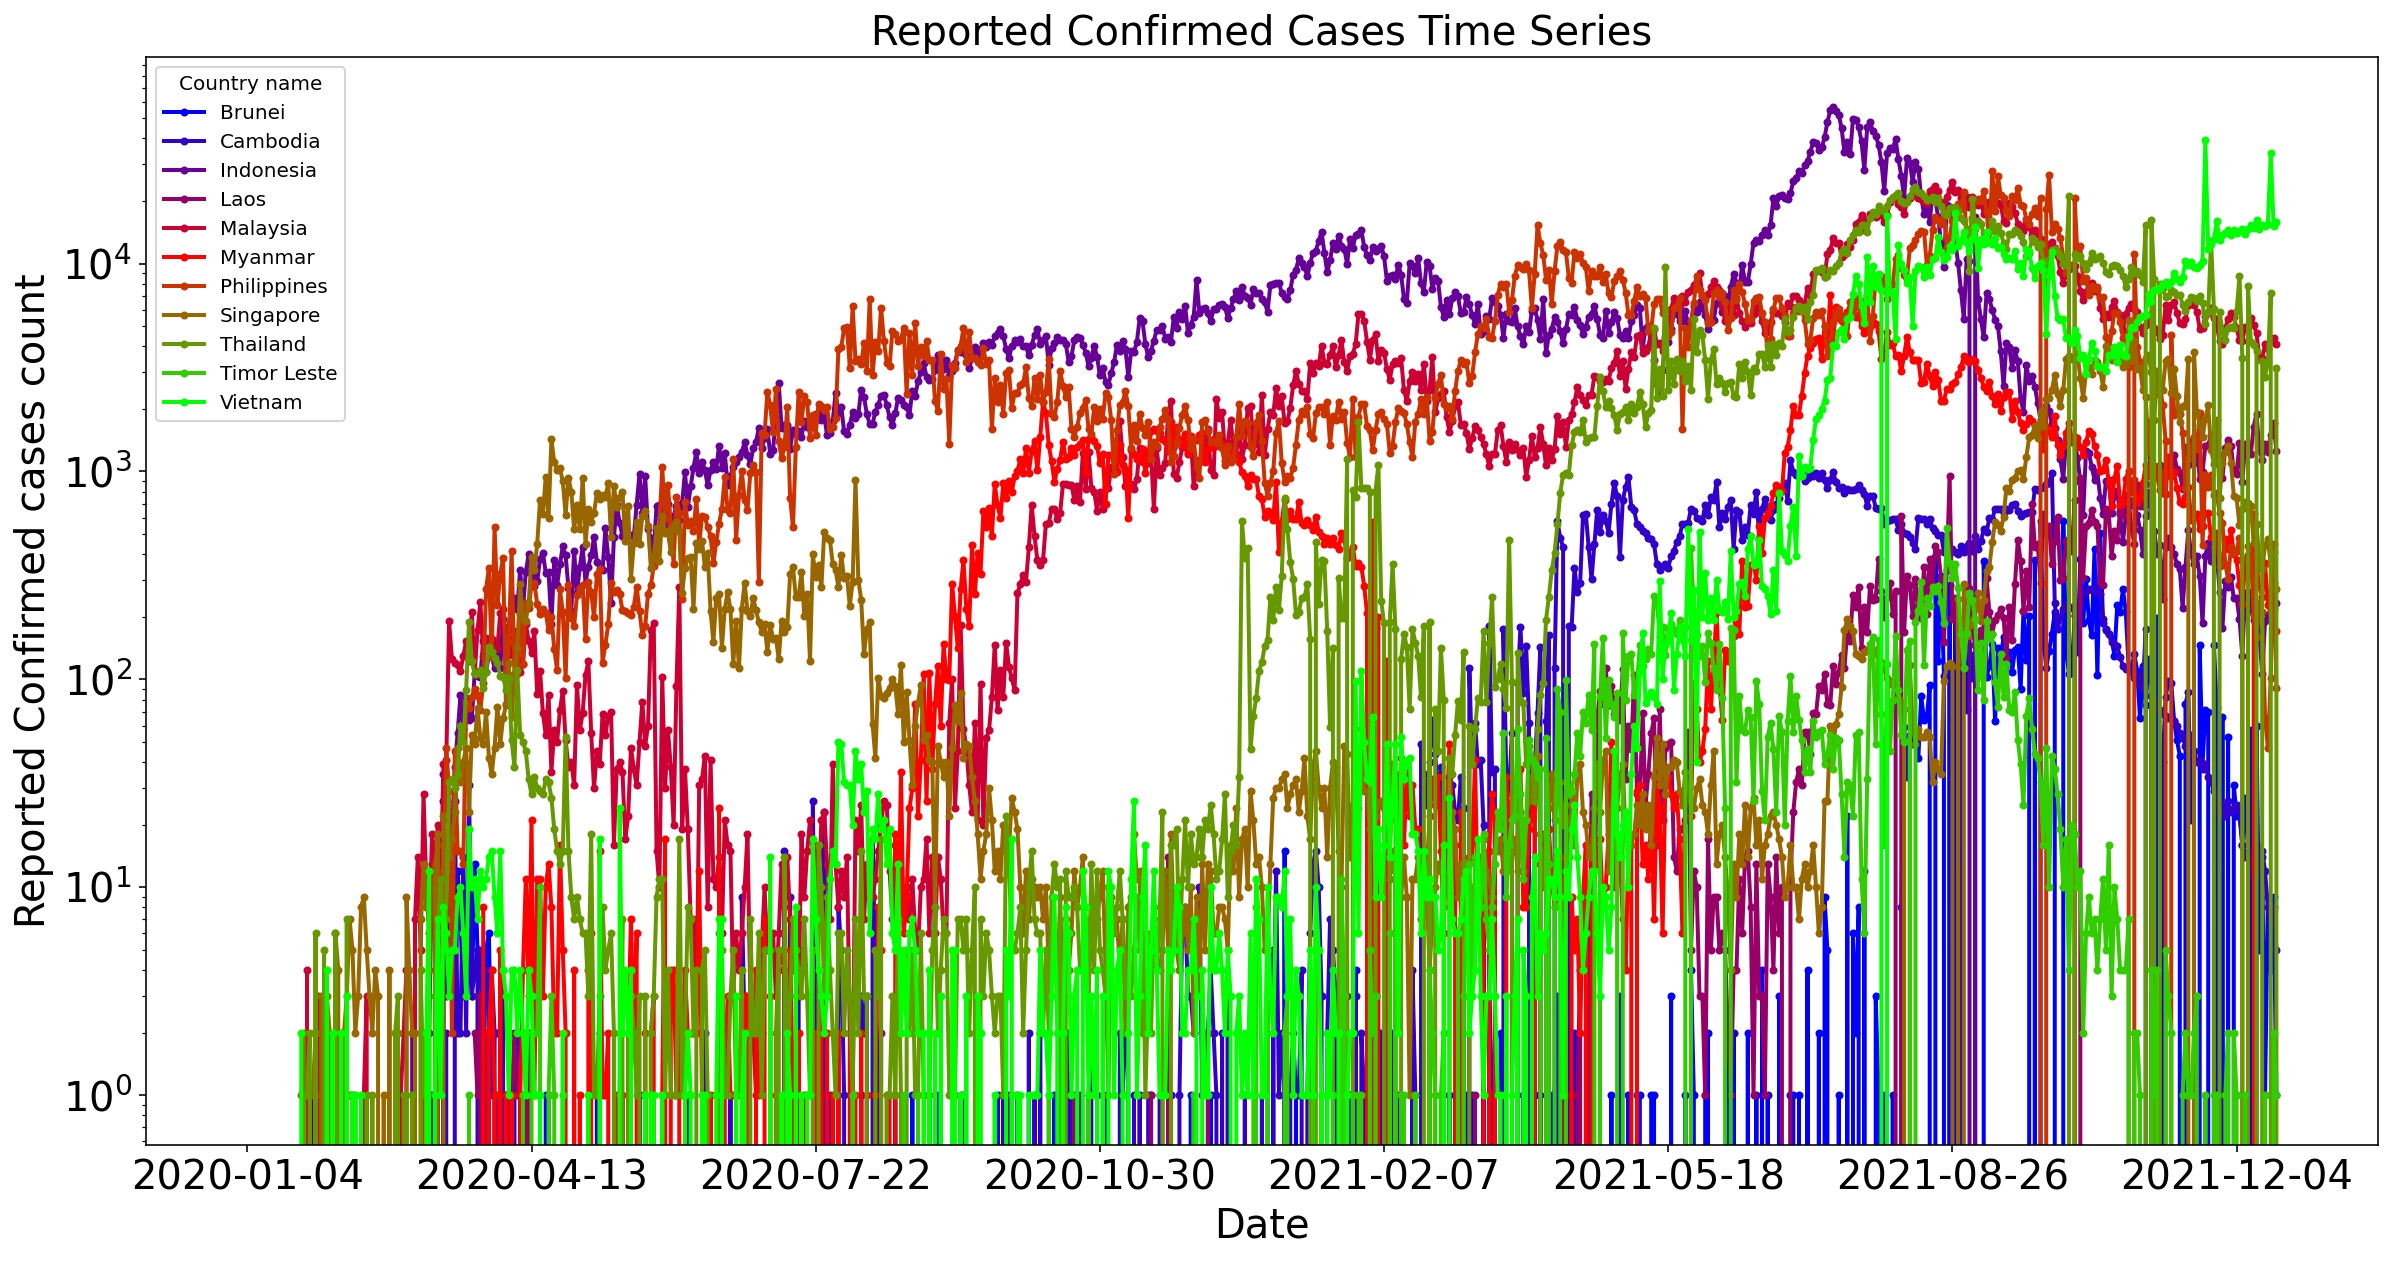

In [73]:
# Plot time series of several countries of interest
df_cases.plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20, logy=True)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Reported Confirmed cases count', fontsize=20);
plt.title('Reported Confirmed Cases Time Series', fontsize=20);

## Number of reported death

In [74]:
df_deaths = covid_19[['Country name', 'Date', 'New deaths']]
df_deaths

,Country name,Date,New deaths
20342,Brunei,2020-03-09,0.0
20343,Brunei,2020-03-10,0.0
20344,Brunei,2020-03-11,0.0
20345,Brunei,2020-03-12,0.0
20346,Brunei,2020-03-13,0.0
...,...,...,...
145308,Vietnam,2021-12-14,252.0
145309,Vietnam,2021-12-15,283.0
145310,Vietnam,2021-12-16,241.0
145311,Vietnam,2021-12-17,246.0


In [75]:
df_deaths = df_deaths.pivot(index='Country name', 
              columns='Date', 
              values='New deaths')

In [76]:
df_deaths= df_deaths.transpose()

In [77]:
datetime_index = pd.DatetimeIndex(df_deaths.index)
df_deaths.index

Index(['2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
       '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12', '2020-01-13',
       ...
       '2021-12-09', '2021-12-10', '2021-12-11', '2021-12-12', '2021-12-13',
       '2021-12-14', '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-18'],
      dtype='object', name='Date', length=715)

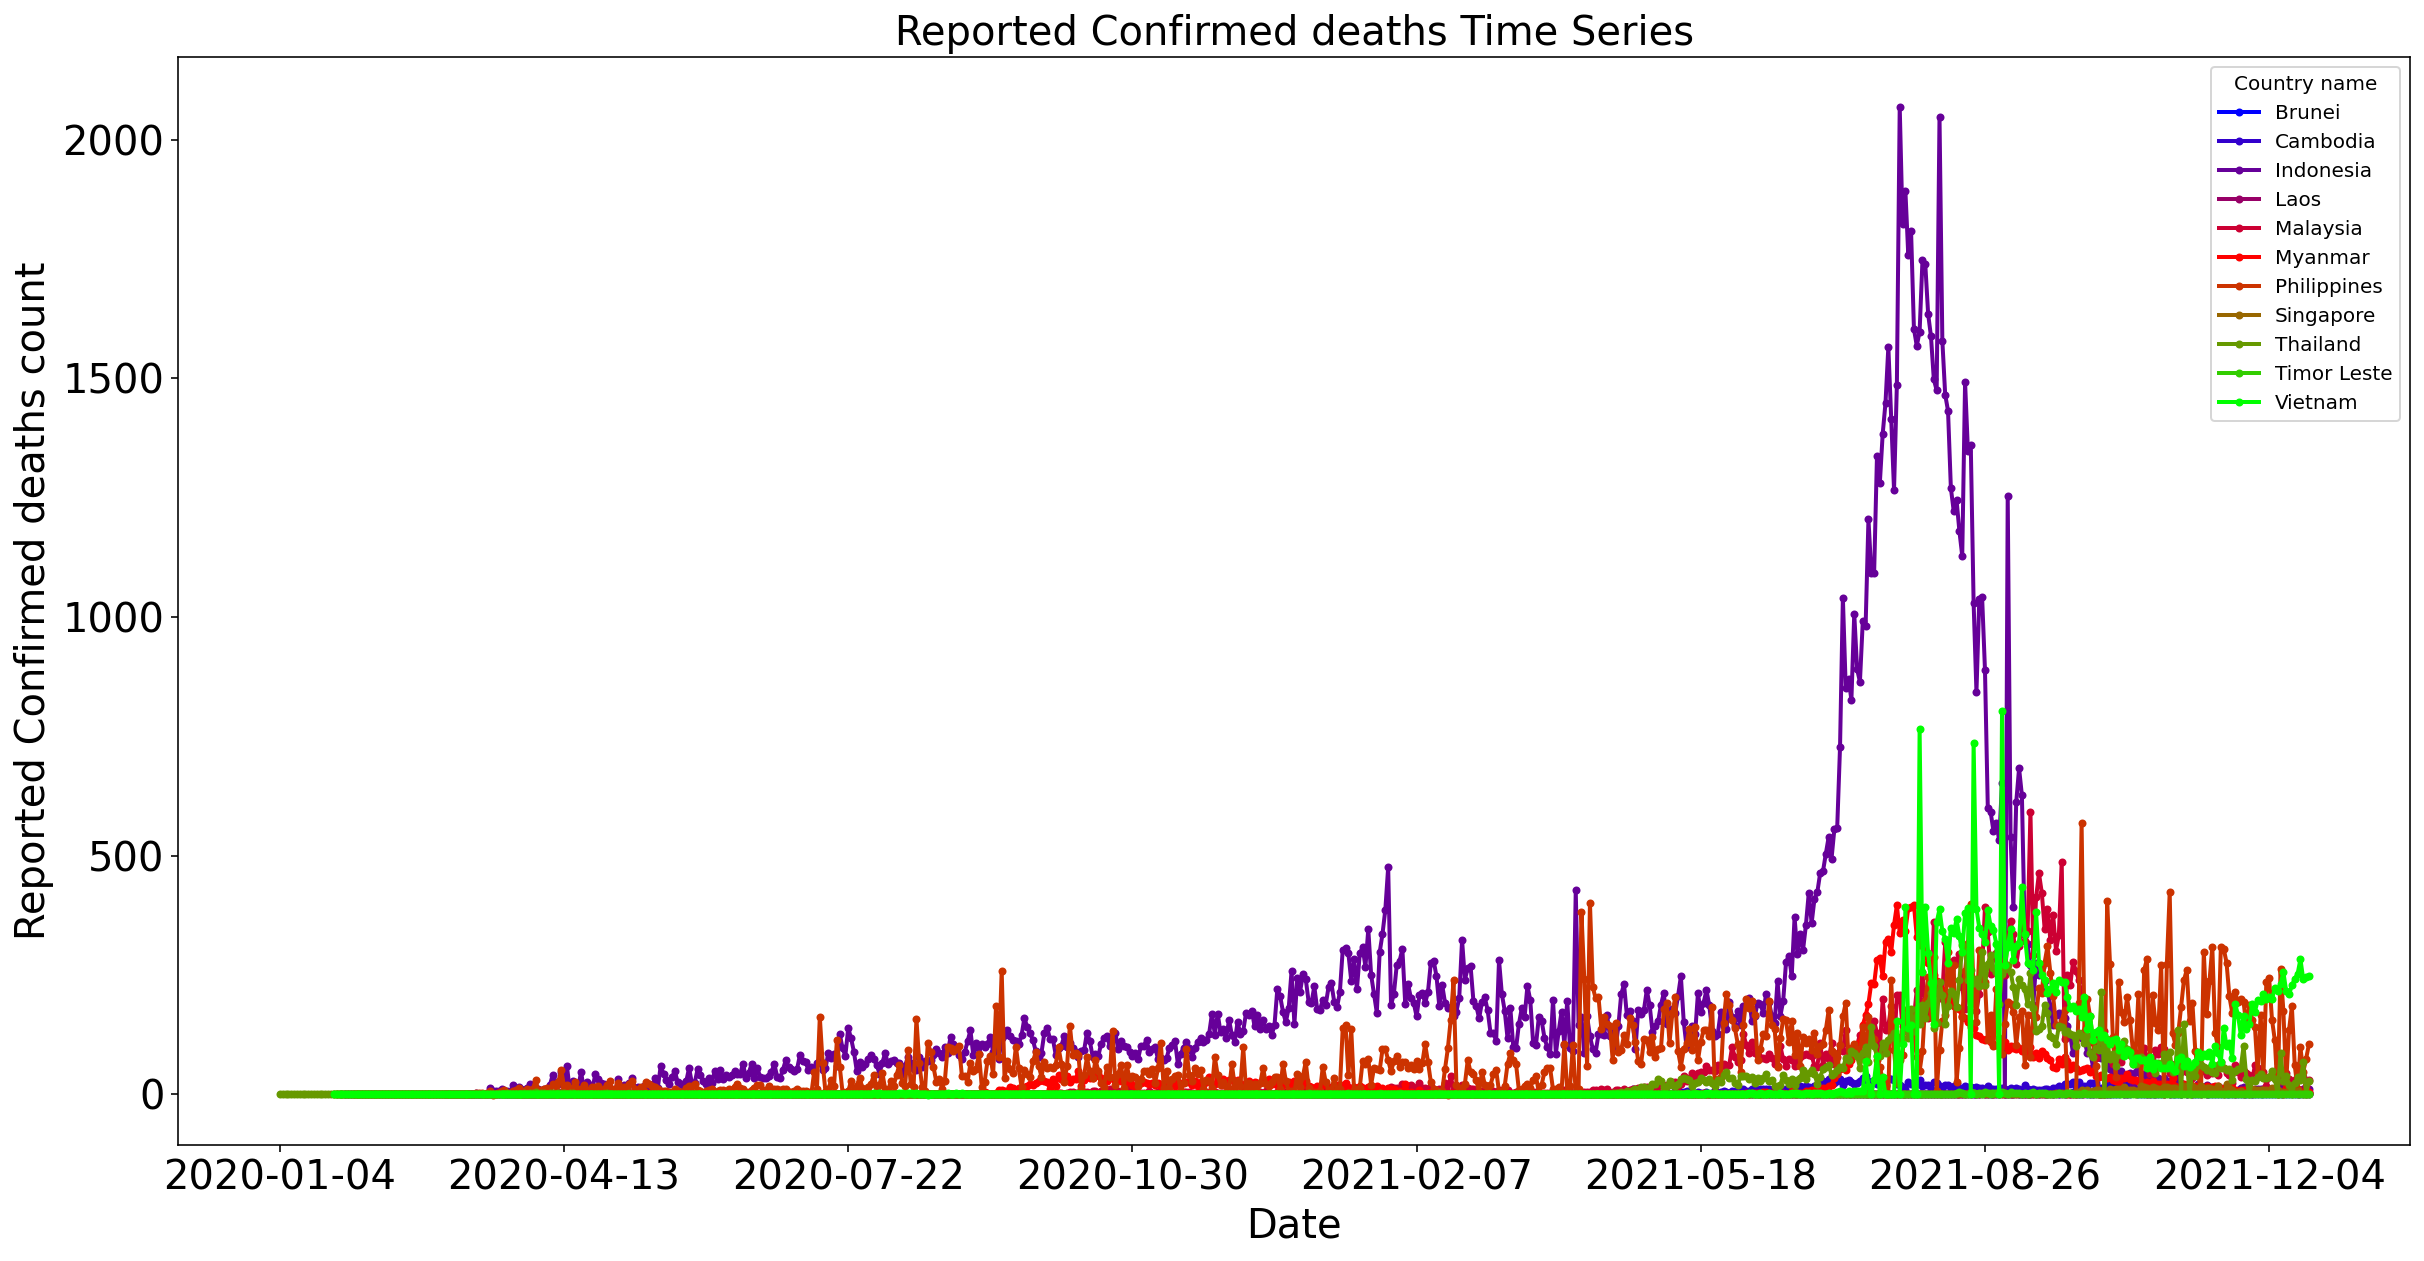

In [78]:
# Plot time series of several countries of interest
df_deaths.plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Reported Confirmed deaths count', fontsize=20);
plt.title('Reported Confirmed deaths Time Series', fontsize=20);

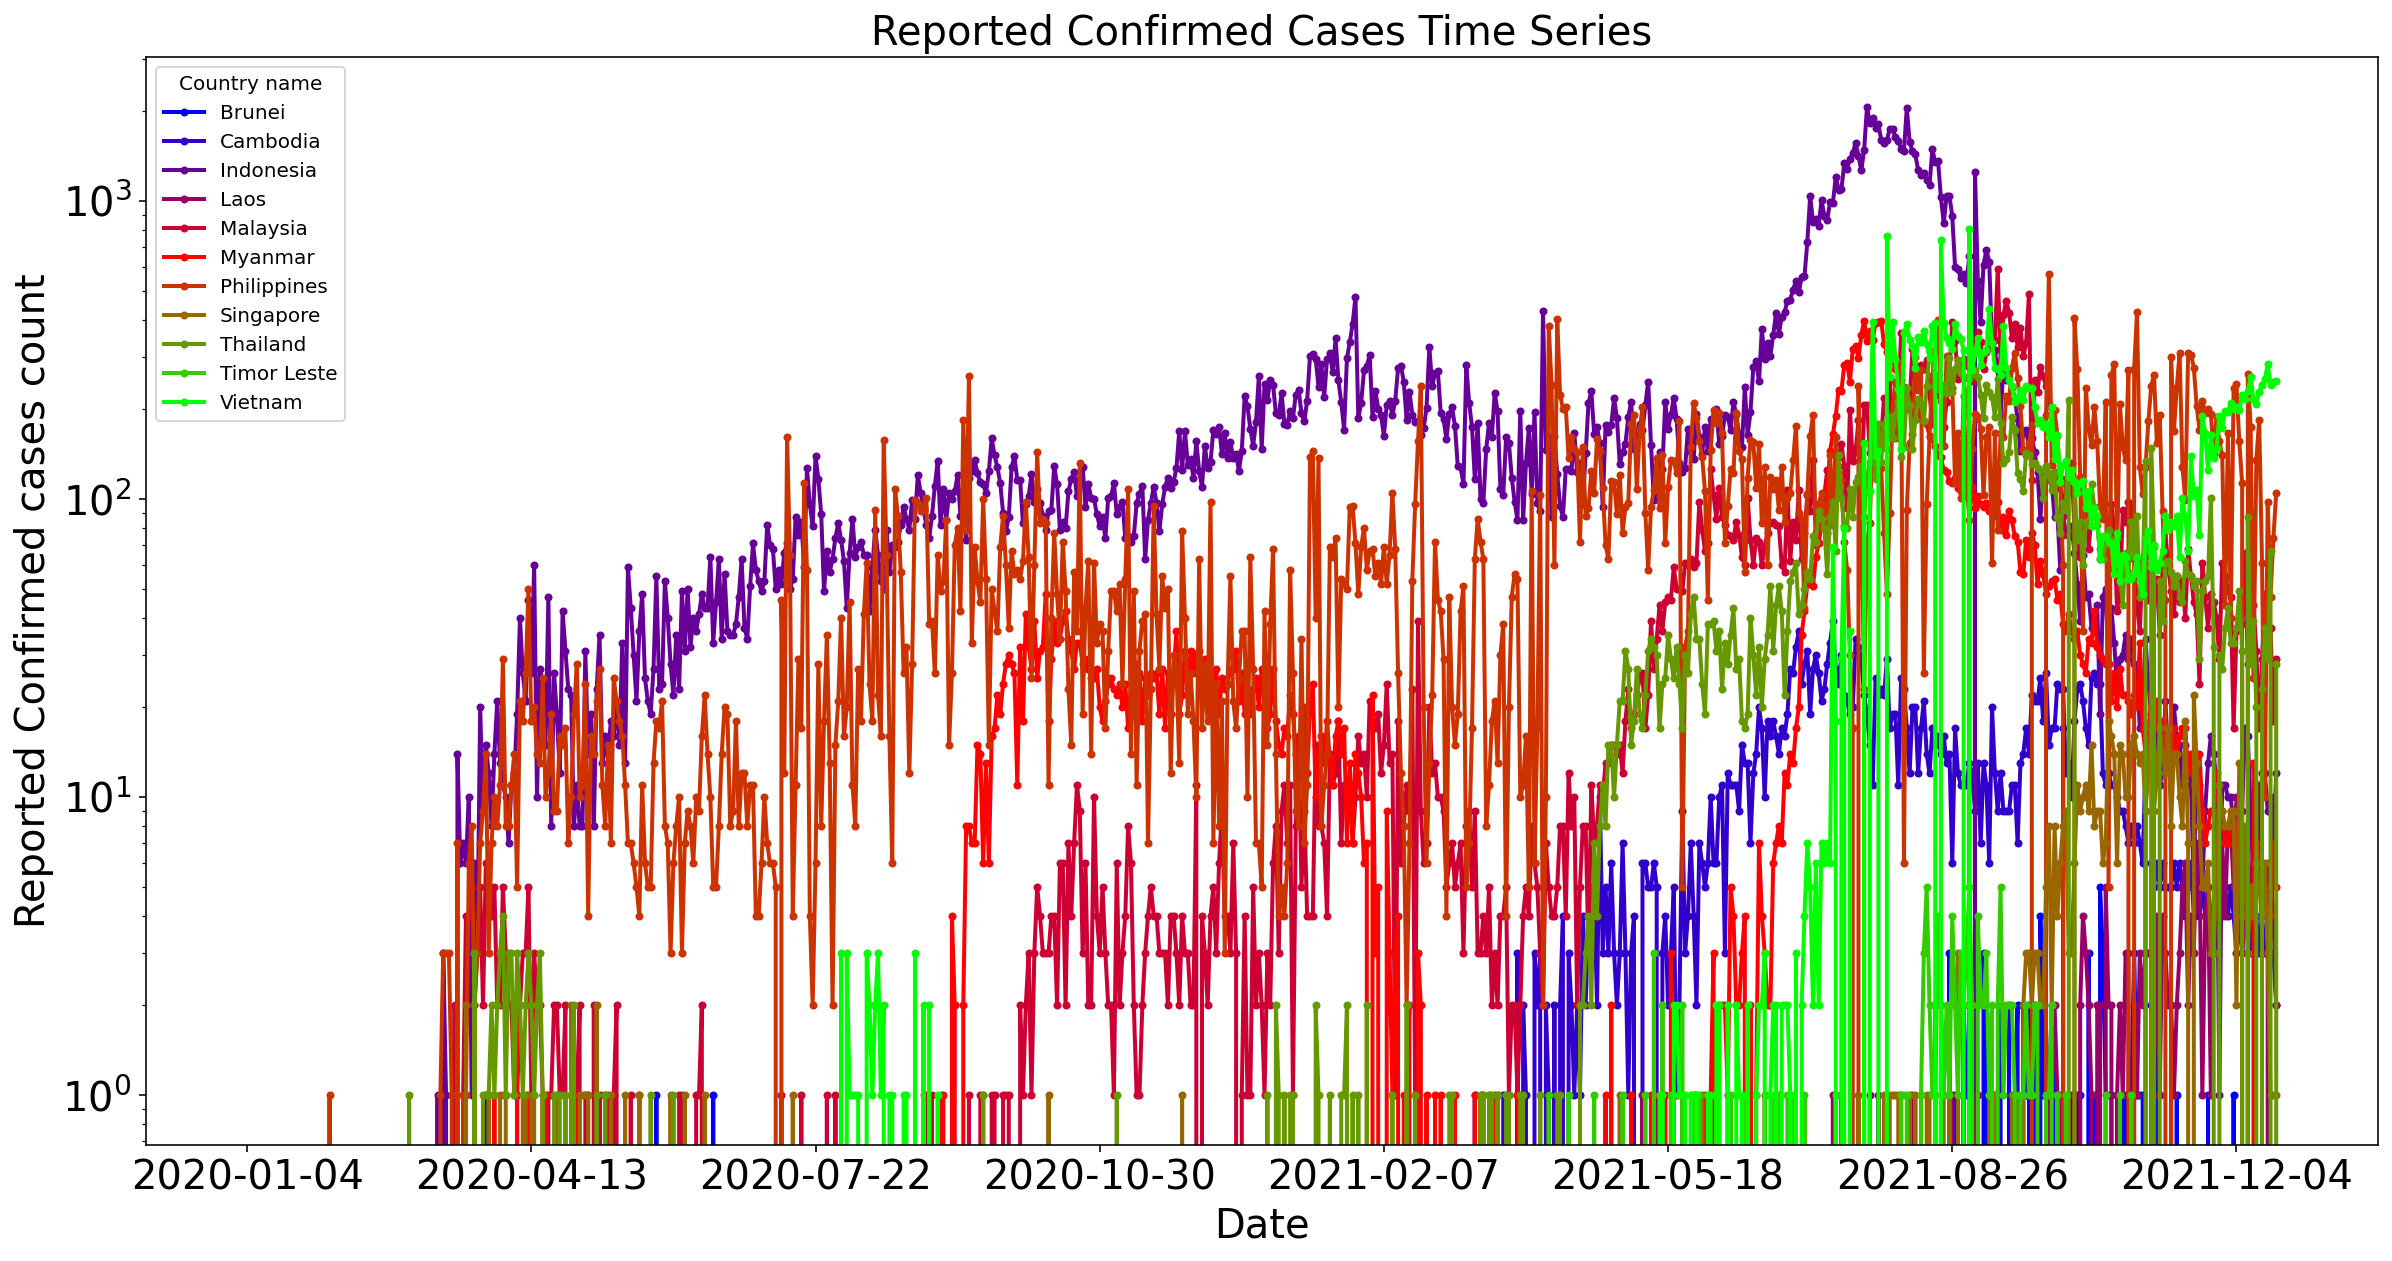

In [79]:
# Plot time series of several countries of interest
df_deaths.plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20, logy=True)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Reported Confirmed cases count', fontsize=20);
plt.title('Reported Confirmed Cases Time Series', fontsize=20);

In [80]:
for col in df_deaths.columns:
    df_deaths.loc[(df_deaths[col] < 100),col] = None

# Check out tail
df_deaths.tail()

Country name,Brunei,Cambodia,Indonesia,Laos,Malaysia,Myanmar,Philippines,Singapore,Thailand,Timor Leste,Vietnam
Date,,,,,,,,,,,
2021-12-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0
2021-12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283.0
2021-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241.0
2021-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.0
2021-12-18,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,248.0


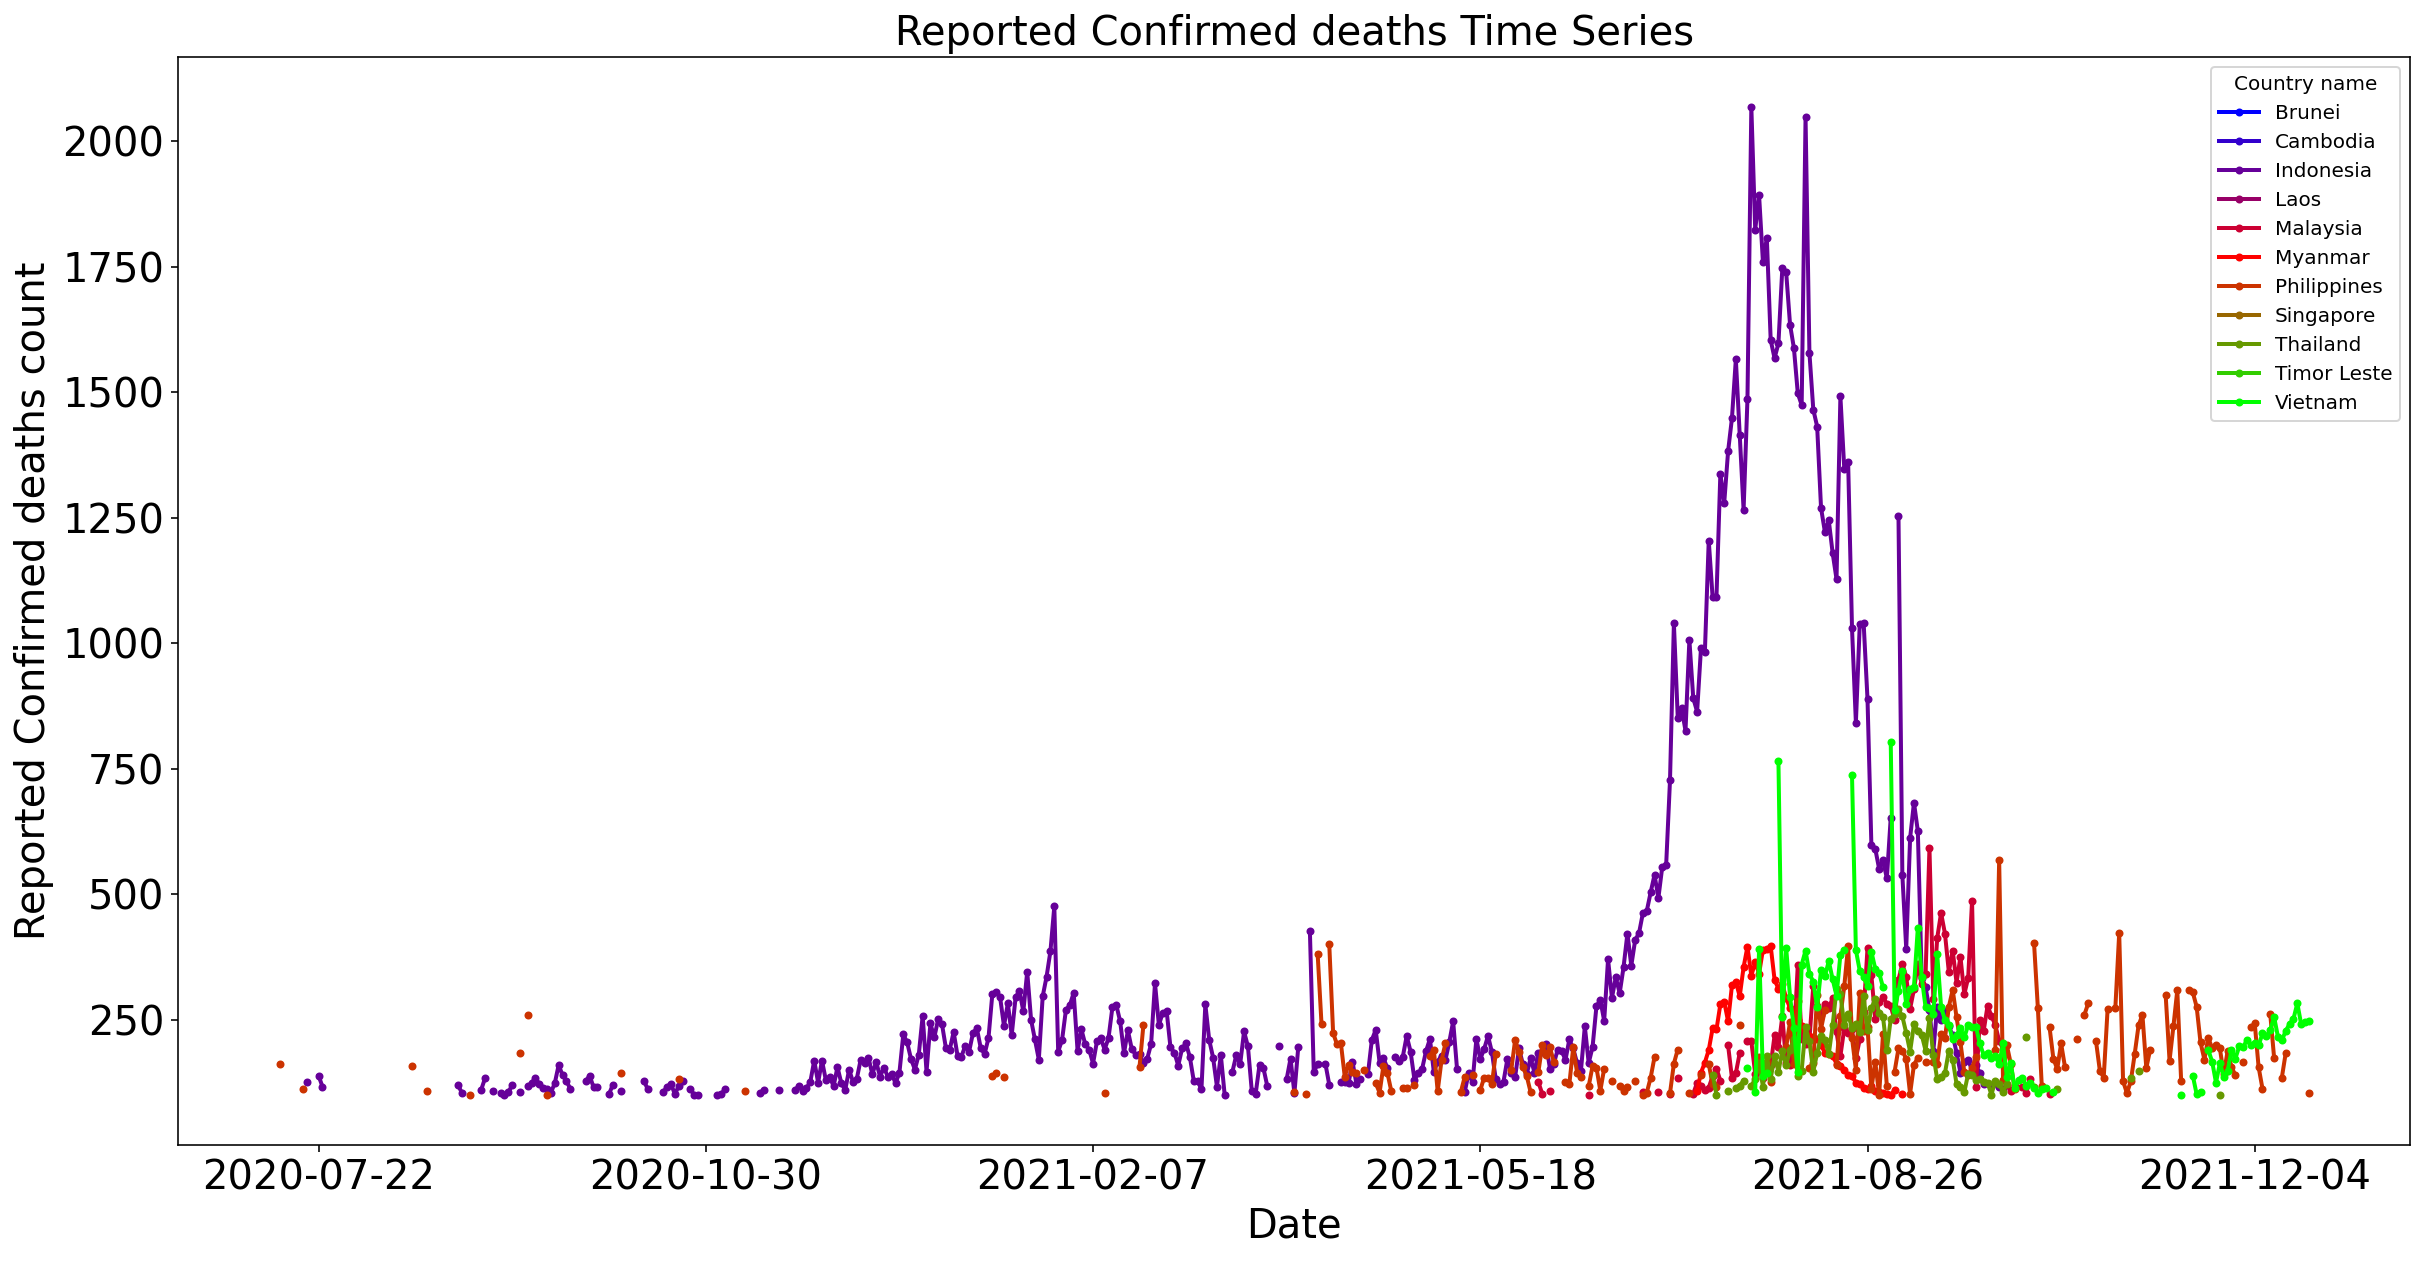

In [81]:
# Plot time series of several countries of interest
df_deaths.plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Reported Confirmed deaths count', fontsize=20);
plt.title('Reported Confirmed deaths Time Series', fontsize=20);

<AxesSubplot:>

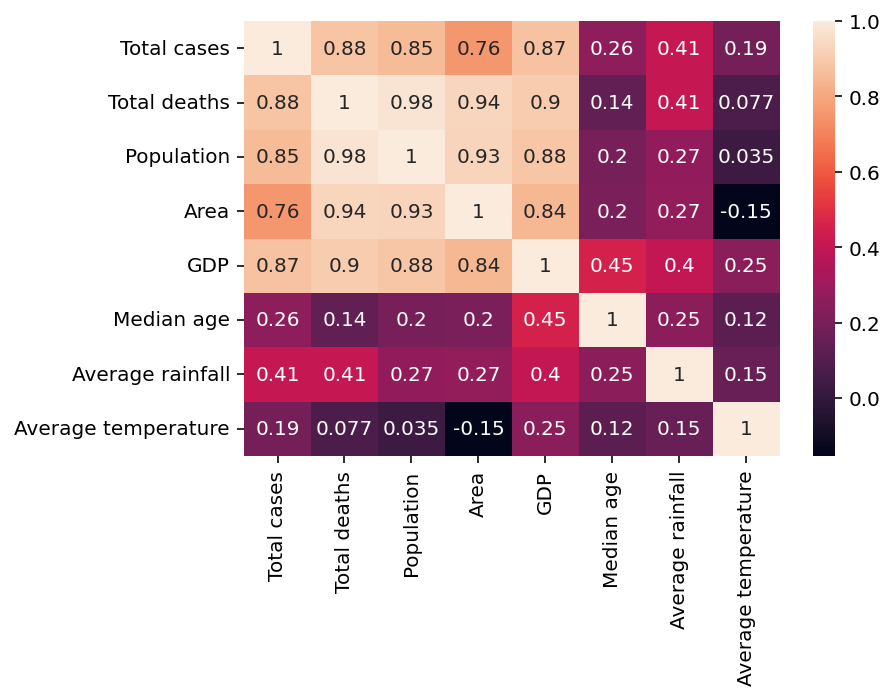

In [82]:
corelation = df.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

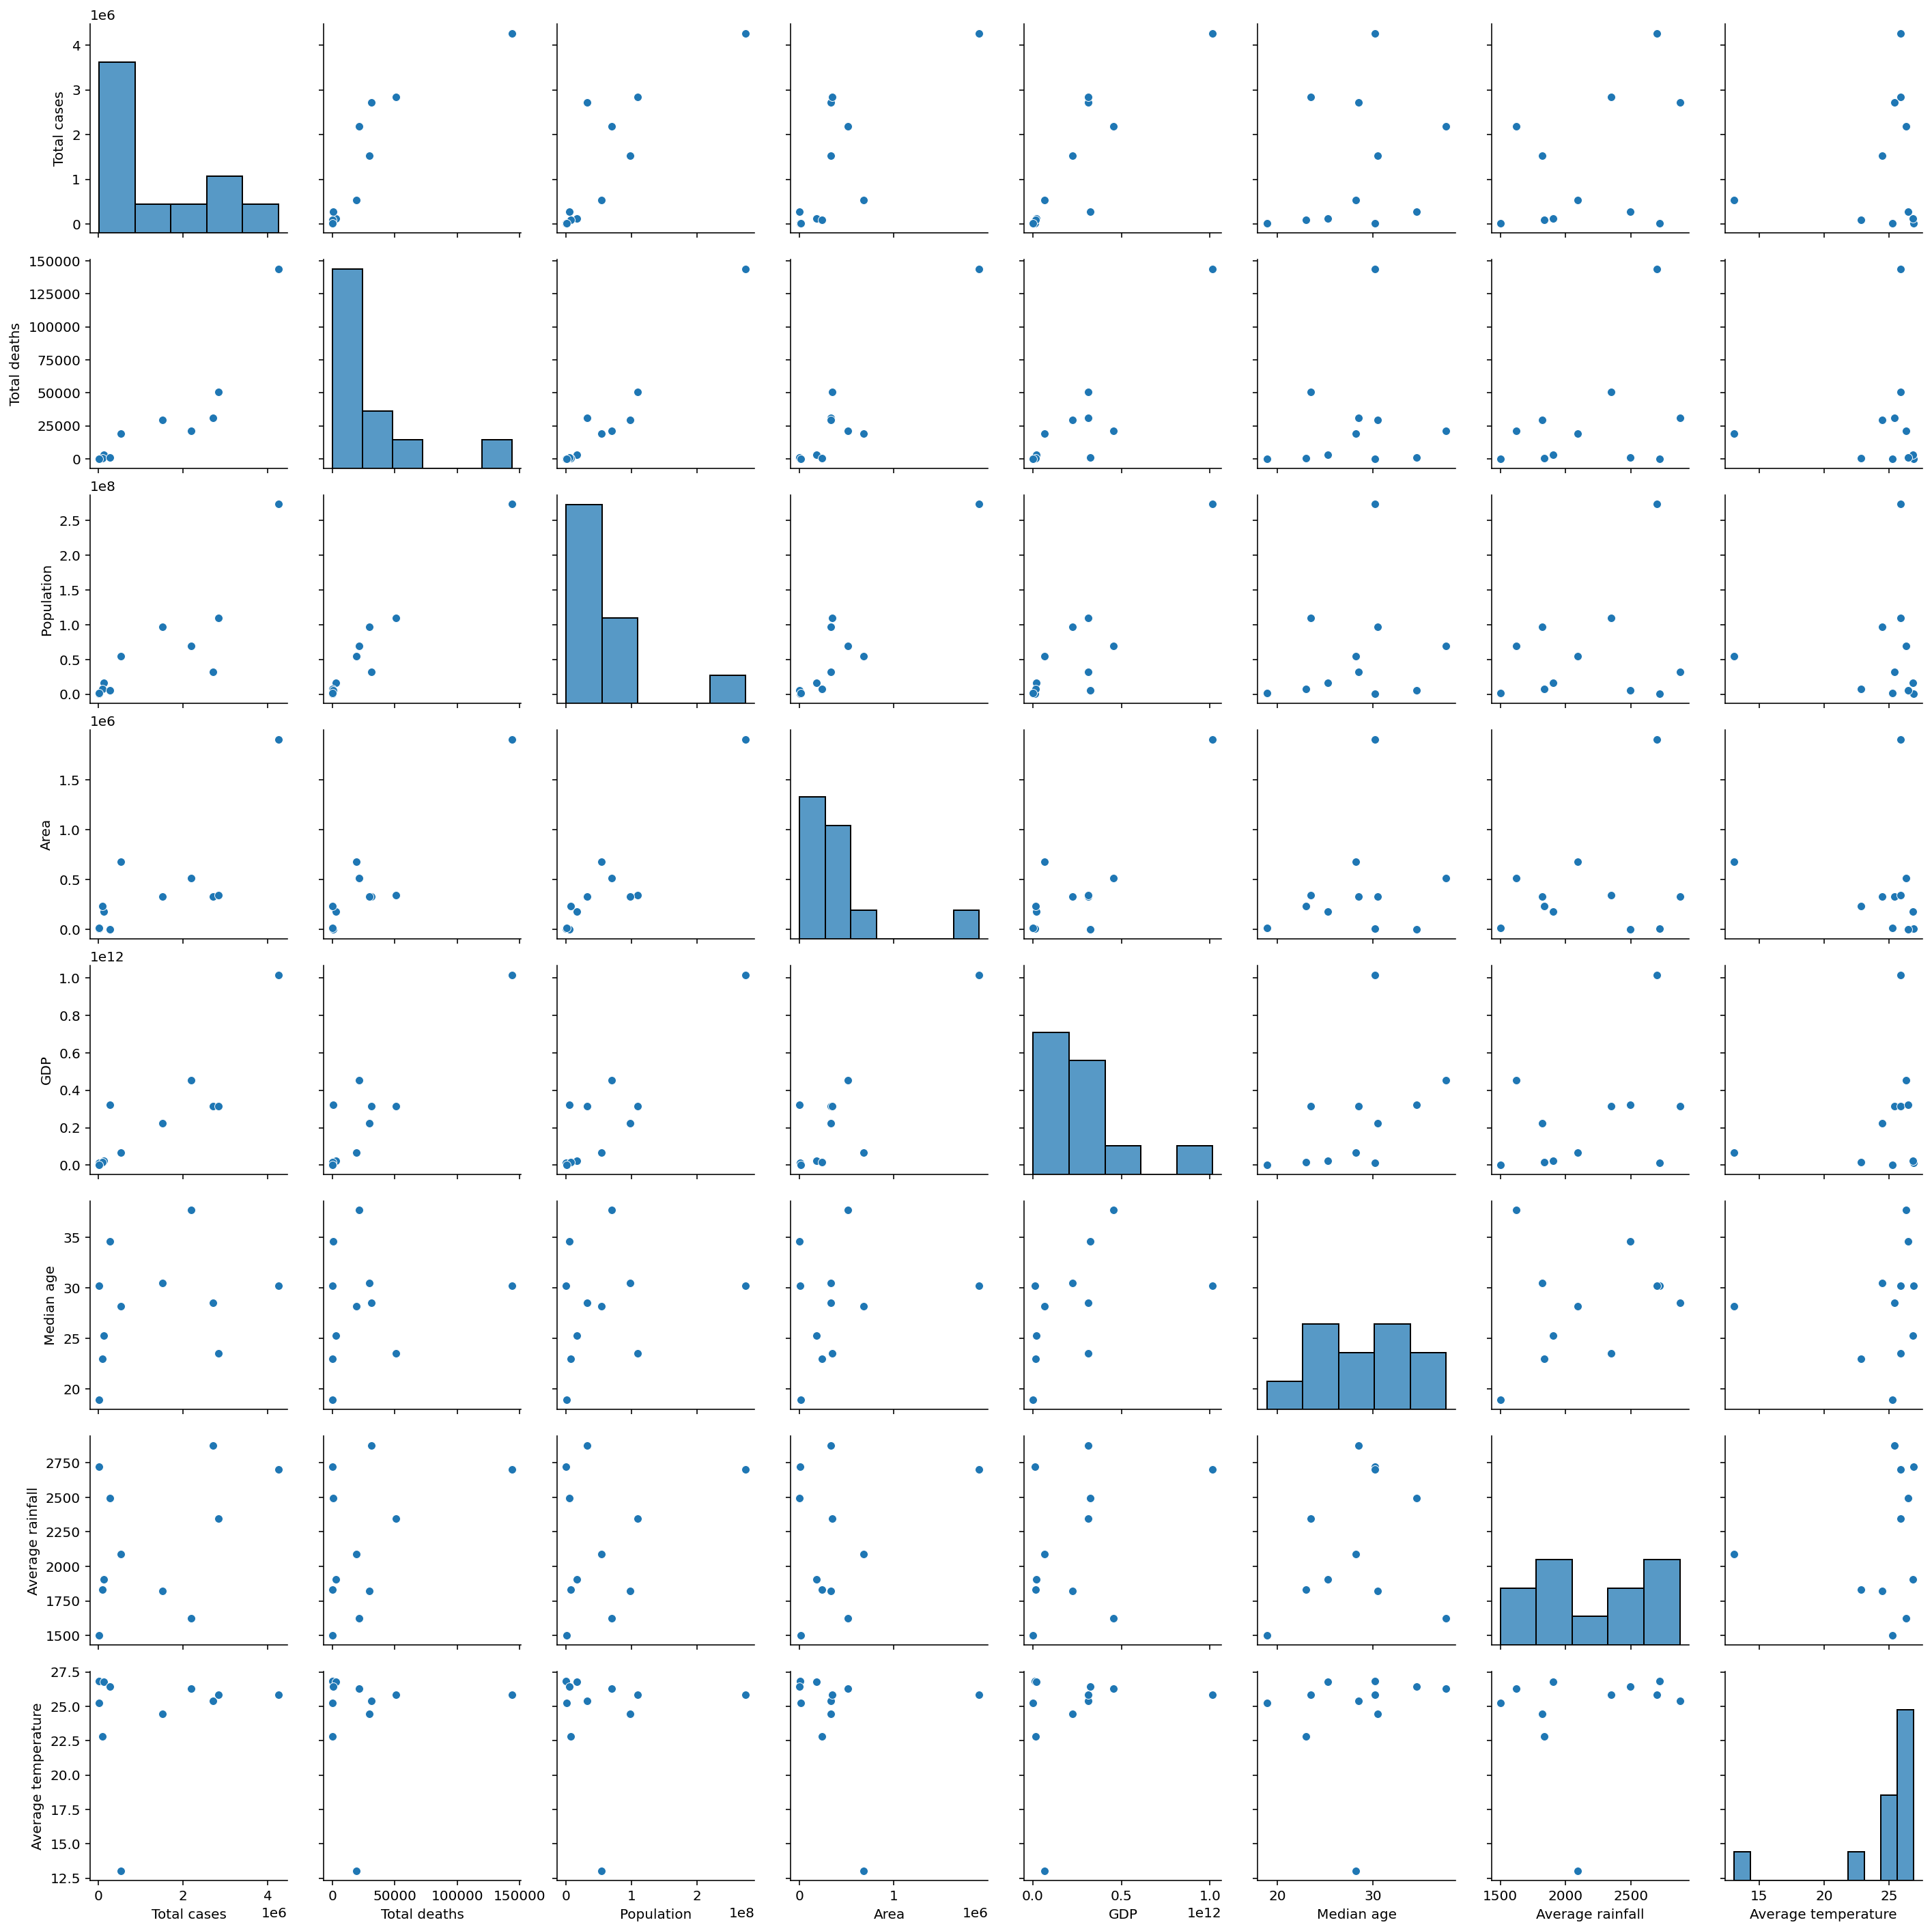

In [83]:
sns.pairplot(df)

## Total cases vs Density

In [ ]:
temp1 = covid_19['New cases']
temp1 = temp1.reset_index()
temp2 = df['Population']/df['Area']
temp2 = temp2.reset_index()
normalised_df = pd.DataFrame()

normalised_df['Total cases'] = temp1['Name']
normalised_df['Density'] = temp2['Global_Sales']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()
normalised_df['year'] = temp1['Year_of_Release'].astype(int)


plt.figure(figsize=(9, 4))
ax = sns.pointplot(x = normalised_df.year, y = normalised_df.release_count, color = 'green', label='Release Count')
ax = sns.pointplot(x = normalised_df.year, y = normalised_df.global_sales, color = 'orange', label='Global Sales')

blue_patch = mpatches.Patch(color='green', label='NUMBER OF RELEASES')
red_patch = mpatches.Patch(color='orange', label='GLOBAL SALES')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', fontsize = 8)

plt.xticks(rotation=45);